In [80]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open("ato_results.json", "r") as f:
    results_ato = json.load(f)

with open("nv_results.json", "r") as f:
    results_nv = json.load(f)

with open("ato_results_stability.json", "r") as f:
    results_ato_stabilty = json.load(f)

with open("nv_results_stability.json", "r") as f:
    results_nv_stability = json.load(f)

The following bar charts compare the optimal objective function values obtained using Full Monte Carlo simulation, Moment Matching and Wasserstein distance reduction. 

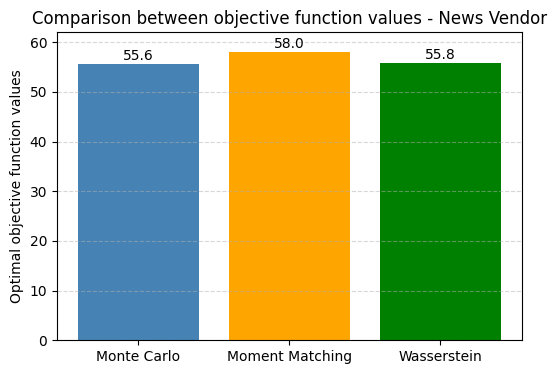

In [81]:
methods = ["Monte Carlo", "Moment Matching", "Wasserstein"]
opt_vals = [results_nv["val_mc"], results_nv["val_mm"], results_nv["val_w"]]

plt.figure(figsize=(6, 4))
bars = plt.bar(methods, opt_vals, color=["steelblue", "orange", "green"])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{yval:.1f}", ha='center', va='bottom')

plt.ylabel("Optimal objective function values")
plt.title("Comparison between objective function values - News Vendor")
plt.ylim(0, max(opt_vals) + 4)  
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

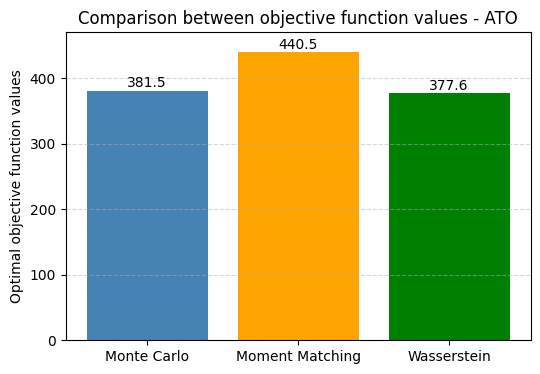

In [82]:
methods = ["Monte Carlo", "Moment Matching", "Wasserstein"]
opt_vals = [results_ato["val_mc"], results_ato["val_mm"], results_ato["val_w"]]

plt.figure(figsize=(6, 4))
bars = plt.bar(methods, opt_vals, color=["steelblue", "orange", "green"])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{yval:.1f}", ha='center', va='bottom')

plt.ylabel("Optimal objective function values")
plt.title("Comparison between objective function values - ATO")
plt.ylim(0, max(opt_vals) + 30 )
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

The following graphs illustrate the optimal quantities obtained using Full Monte Carlo simulation, Moment Matching and Wasserstein distance reduction.

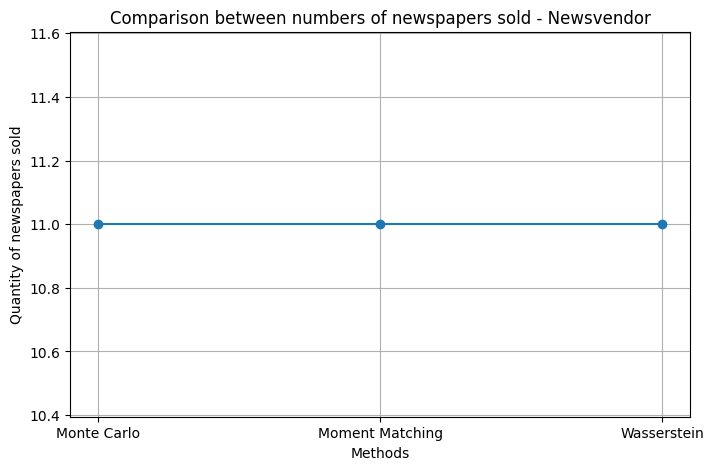

In [83]:
methods = ['Monte Carlo', 'Moment Matching', 'Wasserstein']
newspapers = [results_nv["opt_mc"], results_nv["opt_mm"], results_nv["opt_w"]]

plt.figure(figsize=(8,5))

plt.plot(methods, newspapers, marker='o', linestyle='-')

plt.xlabel('Methods')
plt.ylabel('Quantity of newspapers sold')
plt.title('Comparison between numbers of newspapers sold - Newsvendor')
plt.grid(True)
plt.show()

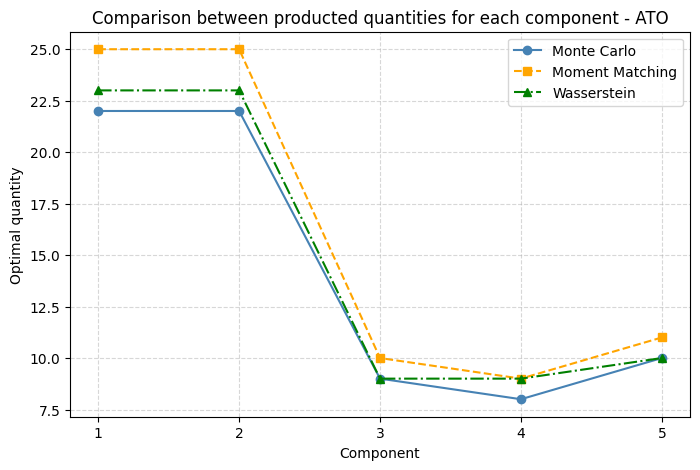

In [84]:
opt_mc = results_ato["opt_mc"]
opt_mm = results_ato["opt_mm"]
opt_w = results_ato["opt_w"]

prodotti = range(1, len(opt_mc) + 1)

plt.figure(figsize=(8,5))
plt.plot(prodotti, opt_mc, marker='o', linestyle='-', label='Monte Carlo', color='steelblue')
plt.plot(prodotti, opt_mm, marker='s', linestyle='--', label='Moment Matching', color='orange')
plt.plot(prodotti, opt_w, marker='^', linestyle='-.', label='Wasserstein', color='green')

plt.xlabel('Component')
plt.ylabel('Optimal quantity')
plt.title('Comparison between producted quantities for each component - ATO')
plt.xticks(prodotti)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The following plots present the demand distributions used in the Assemble-to-Order (ATO) and Newsvendor problems under three different scenario generation methods: Monte Carlo simulation, Moment Matching, and Wasserstein distance-based reduction. 

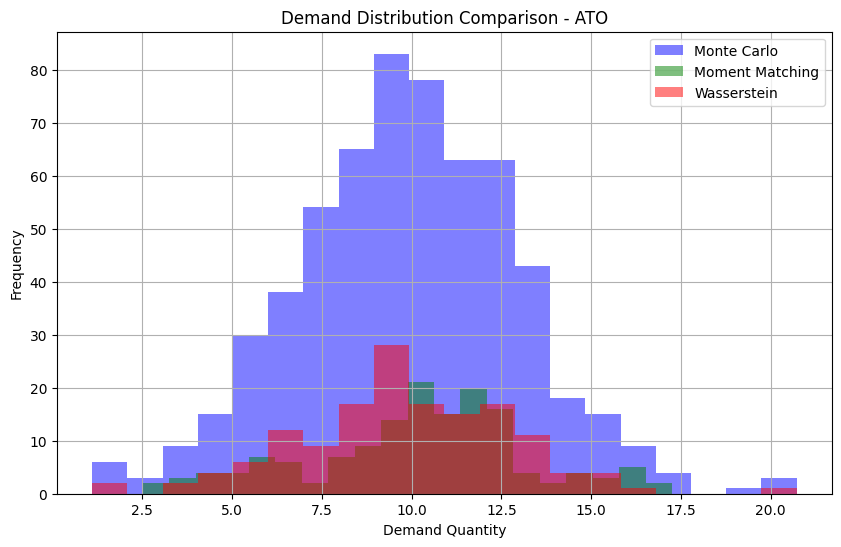

In [85]:
demand_mc = np.array(results_ato["demand_mc"]).flatten()
demand_mm = np.array(results_ato["demand_mm"]).flatten()
demand_w = np.array(results_ato["demand_w"]).flatten()

plt.figure(figsize=(10, 6))
plt.hist(demand_mc, bins=20, alpha=0.5, label='Monte Carlo', color='blue')
plt.hist(demand_mm, bins=20, alpha=0.5, label='Moment Matching', color='green')
plt.hist(demand_w, bins=20, alpha=0.5, label='Wasserstein', color='red')

plt.xlabel('Demand Quantity')
plt.ylabel('Frequency')
plt.title('Demand Distribution Comparison - ATO')
plt.legend()
plt.grid(True)
plt.show()


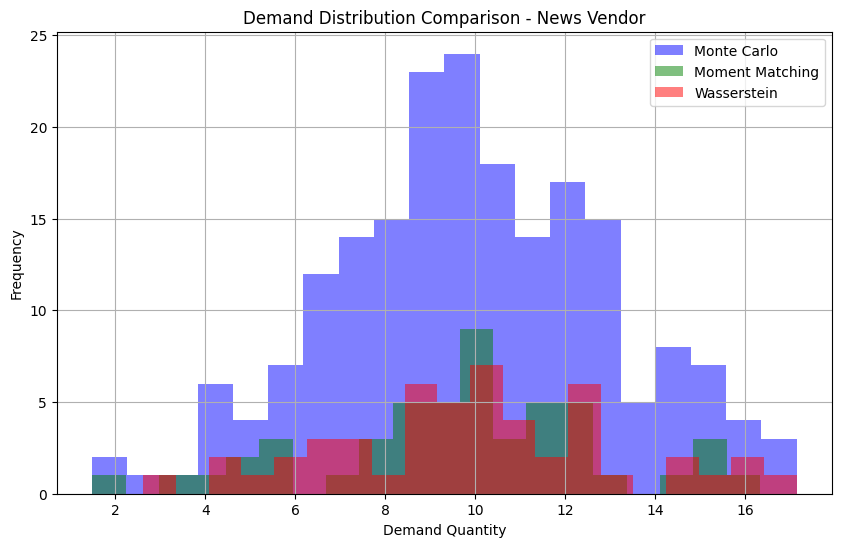

In [86]:
demand_mc = np.array(results_nv["demand_mc"]).flatten()
demand_mm = np.array(results_nv["demand_mm"]).flatten()
demand_w = np.array(results_nv["demand_w"]).flatten()

plt.figure(figsize=(10, 6))
plt.hist(demand_mc, bins=20, alpha=0.5, label='Monte Carlo', color='blue')
plt.hist(demand_mm, bins=20, alpha=0.5, label='Moment Matching', color='green')
plt.hist(demand_w, bins=20, alpha=0.5, label='Wasserstein', color='red')

plt.xlabel('Demand Quantity')
plt.ylabel('Frequency')
plt.title('Demand Distribution Comparison - News Vendor')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
# Ma i boxplot richiedono liste di valori, non intervalli.
# Un modo è creare due boxplot: uno per ci_lower e uno per ci_upper
plt.figure(figsize=(10, 6))
plt.boxplot([ci_lowers, ci_uppers], labels=['CI Lower Bounds', 'CI Upper Bounds'])
plt.title('Boxplot of Confidence Interval Bounds')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Se vuoi invece vedere come gli intervalli cambiano in funzione di n_scenarios
plt.figure(figsize=(10, 6))
plt.errorbar(n_scenarios, [(low + up) / 2 for low, up in zip(ci_lowers, ci_uppers)],
             yerr=[[(up - low)/2 for low, up in zip(ci_lowers, ci_uppers)]],
             fmt='o', capsize=5)
plt.xlabel('Number of Scenarios')
plt.ylabel('Confidence Interval')
plt.title('Confidence Intervals vs Number of Scenarios')
plt.grid(True)
plt.show()

NameError: name 'ci_lowers' is not defined

<Figure size 1000x600 with 0 Axes>